In [ ]:
# from google.colab import drive
# drive.mount('/drive')

# #Optional: move to the desired location:
# %cd /drive/My Drive/500

In [ ]:
from skimage import feature
from skimage.feature import local_binary_pattern
import numpy as np
from sklearn.svm import LinearSVC
from imutils import paths
import cv2
import os
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import _pickle as cPickle
import pandas as pd

from scipy.misc import face
from scipy.signal.signaltools import wiener
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def get_denoising(img):
   
    
    
    resizing = cv2.resize(img, (224, 224)) 
    gray = cv2.cvtColor(resizing, cv2.COLOR_BGR2GRAY)



    gauss =gray.astype("float32")

    filtered_img = wiener(gauss, (5, 5))  #Filter the image
    filtered_img = np.uint8(filtered_img / filtered_img.max() * 255)

    kernel = np.ones((7, 7), np.uint8)
    blackhat = cv2.morphologyEx(filtered_img, cv2.MORPH_BLACKHAT, kernel)

    ret,th = cv2.threshold(blackhat,1,255,cv2.THRESH_BINARY)
    ret,thresh2 = cv2.threshold(th,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    img_paint = cv2.inpaint(resizing,thresh2,1,cv2.INPAINT_TELEA)
    
    return img_paint



def lbp_extraction(img):
    radius = 3
    n_points = 8 * radius
    
    lbp = local_binary_pattern(img, n_points, radius, method='uniform')
    n_bins = int(lbp.max() + 1)
    hist, _ = np.histogram(lbp.ravel(), bins=n_bins, range=(0, n_bins))
    hist = hist.astype("float")                         
    hist /= (hist.sum() + (1e-7))
    return hist

In [ ]:
imagePaths = list(paths.list_images('G:\DATA\Lukman\Data_Baru10'))

In [ ]:
# desc = LocalBinaryPatterns(24, 8)
data = []
labels = pd.DataFrame(columns=['label'])


In [ ]:
for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath)
    
    lbp_features = get_denoising(image)
    
    gray = cv2.cvtColor(lbp_features, cv2.COLOR_BGR2GRAY)
    lbp_get= lbp_extraction(gray)

    
#     feature.append(label)
    data.append(lbp_get)
    
    label = imagePath.split(os.path.sep)[-2]

#     labels.append(label)

    labels.loc[len(labels)] = label





    if  i > 0 and i % 1 == 0:

        print("{}/{}".format(i, len(imagePaths)))
        

1/225
2/225
3/225
4/225
5/225
6/225
7/225
8/225
9/225
10/225
11/225
12/225
13/225
14/225
15/225
16/225
17/225
18/225
19/225
20/225
21/225
22/225
23/225
24/225
25/225
26/225
27/225
28/225
29/225
30/225
31/225
32/225
33/225
34/225
35/225
36/225
37/225
38/225
39/225
40/225
41/225
42/225
43/225
44/225
45/225
46/225
47/225
48/225
49/225
50/225
51/225
52/225
53/225
54/225
55/225
56/225
57/225
58/225
59/225
60/225
61/225
62/225
63/225
64/225
65/225
66/225
67/225
68/225
69/225
70/225
71/225
72/225
73/225
74/225
75/225
76/225
77/225
78/225
79/225
80/225
81/225
82/225
83/225
84/225
85/225
86/225
87/225
88/225
89/225
90/225
91/225
92/225
93/225
94/225
95/225
96/225
97/225
98/225
99/225
100/225
101/225
102/225
103/225
104/225
105/225
106/225
107/225
108/225
109/225
110/225
111/225
112/225
113/225
114/225
115/225
116/225
117/225
118/225
119/225
120/225
121/225
122/225
123/225
124/225
125/225
126/225
127/225
128/225
129/225
130/225
131/225
132/225
133/225
134/225
135/225
136/225
137/225
138/225
139/

In [ ]:
import pandas as pd 

# Create the pandas DataFrame for GLCM features data
lbp_df = pd.DataFrame(data)

#save to csv
lbp_df.to_csv("G:\DATA\Lukman\csv_dnn\lbp_Wiener.csv", index=False)

lbp_df.head()

0         1         2         3         4         5         6   \
0  0.053591  0.023418  0.023298  0.016761  0.014310  0.012317  0.012257   
1  0.061384  0.029058  0.025231  0.020607  0.016024  0.013552  0.011659   
2  0.040218  0.018395  0.015446  0.017498  0.018156  0.020528  0.021106   
3  0.048330  0.017917  0.018575  0.017279  0.016641  0.014369  0.012556   
4  0.035515  0.016223  0.013572  0.014987  0.016522  0.018893  0.018176   

         7         8         9   ...        16        17        18        19  \
0  0.013154  0.015964  0.017299  ...  0.019551  0.020010  0.016323  0.014888   
1  0.012077  0.011779  0.012735  ...  0.013811  0.016422  0.014190  0.014629   
2  0.024275  0.027902  0.028280  ...  0.023617  0.024175  0.018037  0.017937   
3  0.014290  0.016582  0.018993  ...  0.020787  0.020368  0.014967  0.015366   
4  0.022003  0.025072  0.030473  ...  0.025690  0.026885  0.019113  0.016442   

         20        21        22        23        24        25  
0  0.015545  0.016701  0.019252  0.020588  0.059152  0.442144  
1  0.015665  0.016761  0.022341  0.027483  0.066307  0.491251  
2  0.016123  0.014250  0.017199  0.019212  0.057079  0.348852  
3  0.015784  0.017738  0.019790  0.020010  0.059351  0.369739  
4  0.014549  0.014529  0.015944  0.017439  0.052435  0.329440  

[5 rows x 26 columns]

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

lbp_df = pd.read_csv("G:\DATA\Lukman\csv_dnn\lbp_Wiener.csv")

lbp_df.head()

0         1         2         3         4         5         6  \
0  0.053591  0.023418  0.023298  0.016761  0.014310  0.012317  0.012257   
1  0.061384  0.029058  0.025231  0.020607  0.016024  0.013552  0.011659   
2  0.040218  0.018395  0.015446  0.017498  0.018156  0.020528  0.021106   
3  0.048330  0.017917  0.018575  0.017279  0.016641  0.014369  0.012556   
4  0.035515  0.016223  0.013572  0.014987  0.016522  0.018893  0.018176   

          7         8         9  ...        16        17        18        19  \
0  0.013154  0.015964  0.017299  ...  0.019551  0.020010  0.016323  0.014888   
1  0.012077  0.011779  0.012735  ...  0.013811  0.016422  0.014190  0.014629   
2  0.024275  0.027902  0.028280  ...  0.023617  0.024175  0.018037  0.017937   
3  0.014290  0.016582  0.018993  ...  0.020787  0.020368  0.014967  0.015366   
4  0.022003  0.025072  0.030473  ...  0.025690  0.026885  0.019113  0.016442   

         20        21        22        23        24        25  
0  0.015545  0.016701  0.019252  0.020588  0.059152  0.442144  
1  0.015665  0.016761  0.022341  0.027483  0.066307  0.491251  
2  0.016123  0.014250  0.017199  0.019212  0.057079  0.348852  
3  0.015784  0.017738  0.019790  0.020010  0.059351  0.369739  
4  0.014549  0.014529  0.015944  0.017439  0.052435  0.329440  

[5 rows x 26 columns]

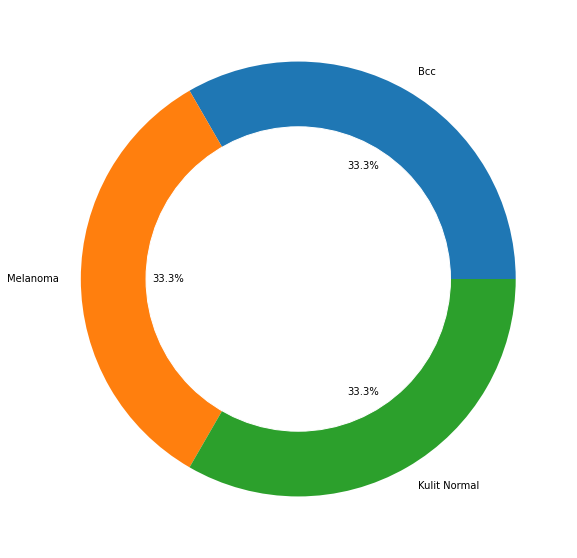

In [ ]:
label_distr = labels['label'].value_counts()

label_name = ['Bcc', 'Melanoma', 'Kulit Normal']

plt.figure(figsize=(20,10))

my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(label_distr, 
        labels=label_name,  
        autopct='%1.1f%%')

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
print(label_distr)

Melanoma        75
Kulit Normal    75
Bcc             75
Name: label, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



def decimal_scaling(data):
    data = np.array(data, dtype=np.float32)
    max_row = data.max(axis=0)
    c = np.array([len(str(int(number))) for number in np.abs(max_row)])
    return data/(10**c)

X = decimal_scaling(lbp_df.values)

In [ ]:
le = LabelEncoder()
le.fit(labels["label"].values)


print(" categorical label : \n", le.classes_)

Y = le.transform(labels['label'].values)
Y = to_categorical(Y)

print("\n\n one hot encoding for sample 0 : \n", Y[0])

 categorical label : 
 ['Bcc' 'Kulit Normal' 'Melanoma']


 one hot encoding for sample 0 : 
 [1. 0. 0.]


In [ ]:
labels

label
0         Bcc
1         Bcc
2         Bcc
3         Bcc
4         Bcc
..        ...
220  Melanoma
221  Melanoma
222  Melanoma
223  Melanoma
224  Melanoma

[225 rows x 1 columns]

In [ ]:
# (trainData, testData, trainLabels, testLabels) = train_test_split(
# 	np.array(data), labels, test_size=0.20, random_state=42)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)
print("Dimensi data :\n")
print("X train \t X test \t Y train \t Y test")  
print("%s \t %s \t %s \t %s" % (X_train.shape, X_test.shape, y_train.shape, y_test.shape))

Dimensi data :

X train 	 X test 	 Y train 	 Y test
(157, 26) 	 (68, 26) 	 (157, 3) 	 (68, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.initializers import RandomNormal, Constant
from tensorflow import keras
from tensorflow.keras import regularizers
# Model with default batch normalization
from tensorflow.keras import layers

from tensorflow.keras.initializers import RandomNormal, Constant
from numpy.random import seed
from tensorflow import random
seed(0)
random.set_seed(0)


# def precision(y_true, y_pred):
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
#     recall = true_positives / (possible_positives + K.epsilon())
#     return recall

# def recall(y_true, y_pred):
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
#     precision = true_positives / (predicted_positives + K.epsilon())
#     return precision

def nn_model(max_len):
    
    model = keras.Sequential()
    model.add(Dense(26, 
                    activation="relu",
                    input_shape=(max_len,)))
    
  ##sebelum tuning    
    model.add(Dense(128, activation='relu')),  
    model.add(Dense(128, activation='relu')),  
    model.add(Dense(128, activation='relu')),  
##sebelum tuning 
    
##sesudah tuning


#     model.add(Dropout(0.2)),
#     model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))),

#     model.add(Dropout(0.2)),
#     model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))),
    
#     model.add(Dropout(0.2)),
#     model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))),
    
#     model.add(Dropout(0.2)),
#     model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))),
    
#     model.add(Dropout(0.2)),
#     model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))),
    
#     model.add(Dropout(0.2)),
#     model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))),
    
#     model.add(Dropout(0.2)),




##sesudah tuning

    model.add(Dense(3,activation="softmax"))
    
    model.summary() 
    
    

    opt = keras.optimizers.RMSprop(learning_rate=0.001)
    model.compile(optimizer=opt, 
                  loss='categorical_crossentropy',
                  metrics = ['accuracy'])

    return model
 

# ------------------------- check model -----------------------------
def check_model(model_, x, y, x_val, y_val, epochs_, batch_size_, verbose_):

    hist = model_.fit(x, 
                      y,
                      epochs=epochs_,
                      batch_size=batch_size_,
                      verbose=verbose_,
                      validation_data=(x_val,y_val))
    return hist 


# def check_model(model_, x, y, x_val, y_val, epochs_):

#     hist = model_.fit(x, 
#                       y,
#                       epochs=epochs_,
#                       validation_data=(x_val,y_val))
#     return hist 





In [ ]:
max_len = X_train.shape[1]  

EPOCHS = 100
BATCH_SIZE = 32
VERBOSE=2

model = nn_model(max_len)
history=check_model(model, X_train,y_train,X_test,y_test, EPOCHS, BATCH_SIZE, VERBOSE)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 26)                702       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3456      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 387       
Total params: 37,569
Trainable params: 37,569
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 2s - loss: 1.1011 - accuracy: 0.2611 - val_loss: 1.0992 - val_accuracy: 0.3382
Epoch 2/100
5/5 - 0s 

Epoch 75/100
5/5 - 0s - loss: 0.8000 - accuracy: 0.6242 - val_loss: 0.9068 - val_accuracy: 0.5588
Epoch 76/100
5/5 - 0s - loss: 0.9037 - accuracy: 0.6306 - val_loss: 0.8556 - val_accuracy: 0.6765
Epoch 77/100
5/5 - 0s - loss: 0.8021 - accuracy: 0.6242 - val_loss: 0.7814 - val_accuracy: 0.6765
Epoch 78/100
5/5 - 0s - loss: 0.7739 - accuracy: 0.6433 - val_loss: 0.9490 - val_accuracy: 0.5441
Epoch 79/100
5/5 - 0s - loss: 0.7803 - accuracy: 0.6433 - val_loss: 0.7778 - val_accuracy: 0.6618
Epoch 80/100
5/5 - 0s - loss: 0.7874 - accuracy: 0.6369 - val_loss: 0.7859 - val_accuracy: 0.6765
Epoch 81/100
5/5 - 0s - loss: 0.7555 - accuracy: 0.6561 - val_loss: 0.7939 - val_accuracy: 0.6765
Epoch 82/100
5/5 - 0s - loss: 0.7492 - accuracy: 0.6369 - val_loss: 0.8526 - val_accuracy: 0.6765
Epoch 83/100
5/5 - 0s - loss: 0.8799 - accuracy: 0.5860 - val_loss: 0.7943 - val_accuracy: 0.6029
Epoch 84/100
5/5 - 0s - loss: 0.7664 - accuracy: 0.6051 - val_loss: 0.9474 - val_accuracy: 0.5294
Epoch 85/100
5/5 - 0

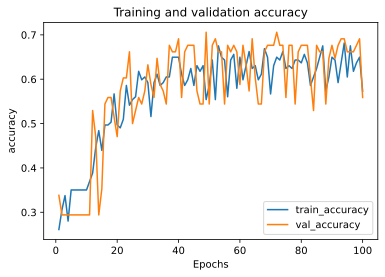

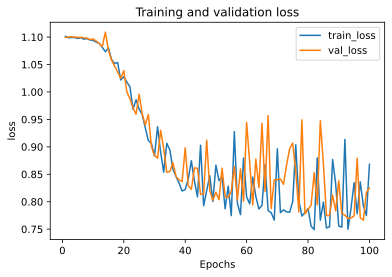

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

plot_metric(history, 'accuracy')
plot_metric(history, 'loss')

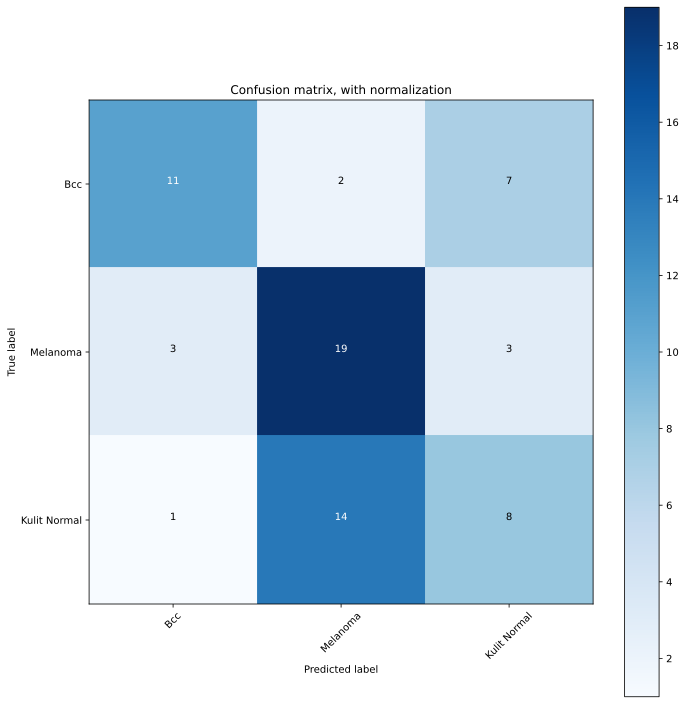

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 10))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
 # predict test data
y_pred=model.predict(X_test)
y_pred1=model.predict(X_train)


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, 
                      classes=['Bcc', 'Melanoma', 'Kulit Normal'],
                      normalize=False,
                      title='Confusion matrix, with normalization')

In [ ]:
print(classification_report(y_test.argmax(axis=1), 
                            y_pred.argmax(axis=1), 
                            target_names=['Bcc', 'Melanoma', 'Kulit Normal']))

              precision    recall  f1-score   support

         Bcc       0.73      0.55      0.63        20
    Melanoma       0.54      0.76      0.63        25
Kulit Normal       0.44      0.35      0.39        23

    accuracy                           0.56        68
   macro avg       0.57      0.55      0.55        68
weighted avg       0.57      0.56      0.55        68



In [ ]:
import numpy as np

def display_summary(true,pred):
    tn, fp, fn, tp = confusion_matrix(true,pred).ravel()
    print('confusion matrix')
    print(np.array([[tp,fp],[fn,tn]]))
    print('sensitivity is %f',1.*tp/(tp+fn))
    print('specificity is %f',1.*tn/(tn+fp))
    print('accuracy is %f',1.*(tp+tn)/(tp+tn+fp+fn))
    print('balanced accuracy is %',1./2*(1.*tp/(tp+fn)+1.*tn/(tn+fp)))
 
print('DNN')
display_summary(y_test.argmax(axis=1), y_pred.argmax(axis=1))

DNN


ValueError: too many values to unpack (expected 4)

In [ ]:
data-8

radius 1
n_p 8

# accuracy: 0.5605  - val_accuracy: 0.7206

radius 2
n_p 8

# accuracy: 0.5478 - val_accuracy: 0.6471

radius 3
n_p 8

# accuracy: 0.5605  - val_accuracy: 0.5588

In [ ]:
data-10

radius 1
n_p 8

# accuracy: 0.5414 - val_loss: 0.7474 - val_accuracy: 0.6471

radius 2
n_p 8

# accuracy: 0.5796 - val_loss: 0.7622 - val_accuracy: 0.5882

radius 3
n_p 8
            
# accuracy: 0.5732 - val_loss: 0.8250 - val_accuracy: 0.5588